In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def save_figure(file_name, save = True):
    if save:
        print("Saving figure to file ./cs5630_final_TeX/figures/"+file_name+".pdf")
        plt.savefig("../cs5630_final_TeX/figures/"+file_name+".pdf")

# San-Francisco 

In [5]:
sf_data = pd.read_csv("../data/cleaned_data/SanFrancisco.csv")
sf_data.dtypes

Unnamed: 0      int64
Dates          object
Category       object
DayOfWeek       int64
PdDistrict     object
Address        object
X             float64
Y             float64
year            int64
month           int64
day             int64
hour            int64
violent          bool
street1        object
street2        object
str1           object
str2           object
dtype: object

In [6]:
for c in sf_data["Category"].drop_duplicates():
    print(c, end=",")

WARRANTS,OTHER OFFENSES,LARCENY/THEFT,VEHICLE THEFT,VANDALISM,NON-CRIMINAL,ROBBERY,ASSAULT,WEAPON LAWS,BURGLARY,SUSPICIOUS OCC,DRUNKENNESS,FORGERY/COUNTERFEITING,DRUG/NARCOTIC,STOLEN PROPERTY,SECONDARY CODES,TRESPASS,MISSING PERSON,FRAUD,KIDNAPPING,RUNAWAY,DRIVING UNDER THE INFLUENCE,SEX OFFENSES FORCIBLE,PROSTITUTION,DISORDERLY CONDUCT,ARSON,FAMILY OFFENSES,LIQUOR LAWS,BRIBERY,EMBEZZLEMENT,SUICIDE,LOITERING,SEX OFFENSES NON FORCIBLE,EXTORTION,GAMBLING,BAD CHECKS,TREA,RECOVERED VEHICLE,PORNOGRAPHY/OBSCENE MAT,

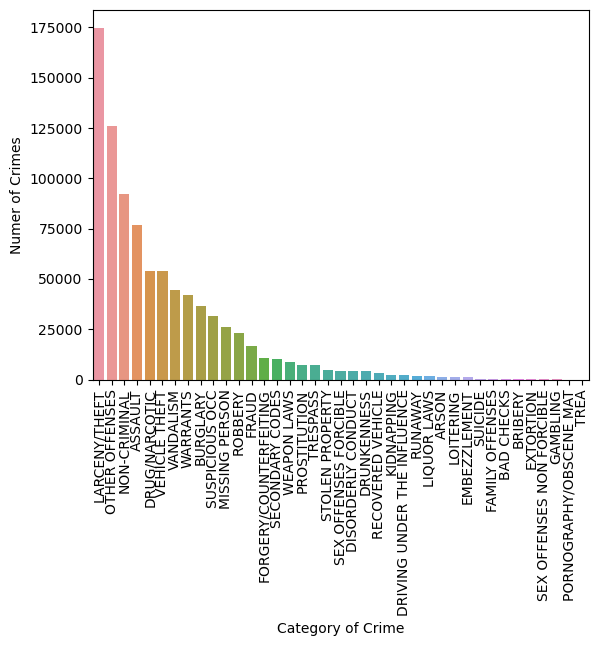

In [8]:
bar_plot = sns.barplot(
    data = sf_data["Category"].value_counts().reset_index(),
    x="index", y="Category"
)
plt.xticks(rotation = 90)
plt.xlabel("Category of Crime")
plt.ylabel("Numer of Crimes")
plt.show()

<AxesSubplot: xlabel='X', ylabel='Y'>

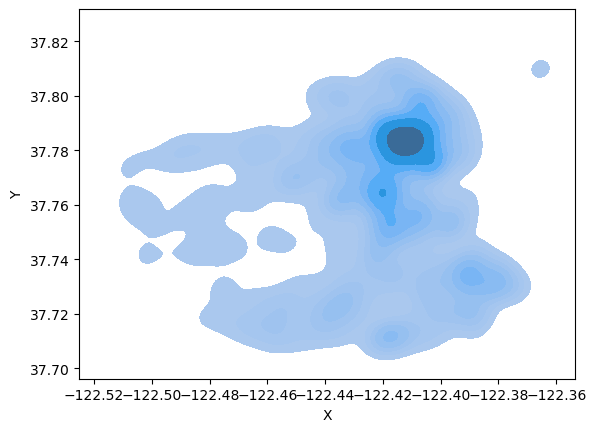

In [9]:
sns.kdeplot(data = sf_data[sf_data["Category"] == "ASSAULT"], x="X", y="Y", fill=True)

In [39]:
# top_categories = sf_data["Category"].value_counts().head(9).index 
# top_cat_data = sf_data[sf_data["Category"].isin(top_categories)]
# g = sns.FacetGrid(top_cat_data, col="Category", col_wrap=3)
# g.map(sns.kdeplot, "X", "Y")

<Figure size 32000x24000 with 0 Axes>

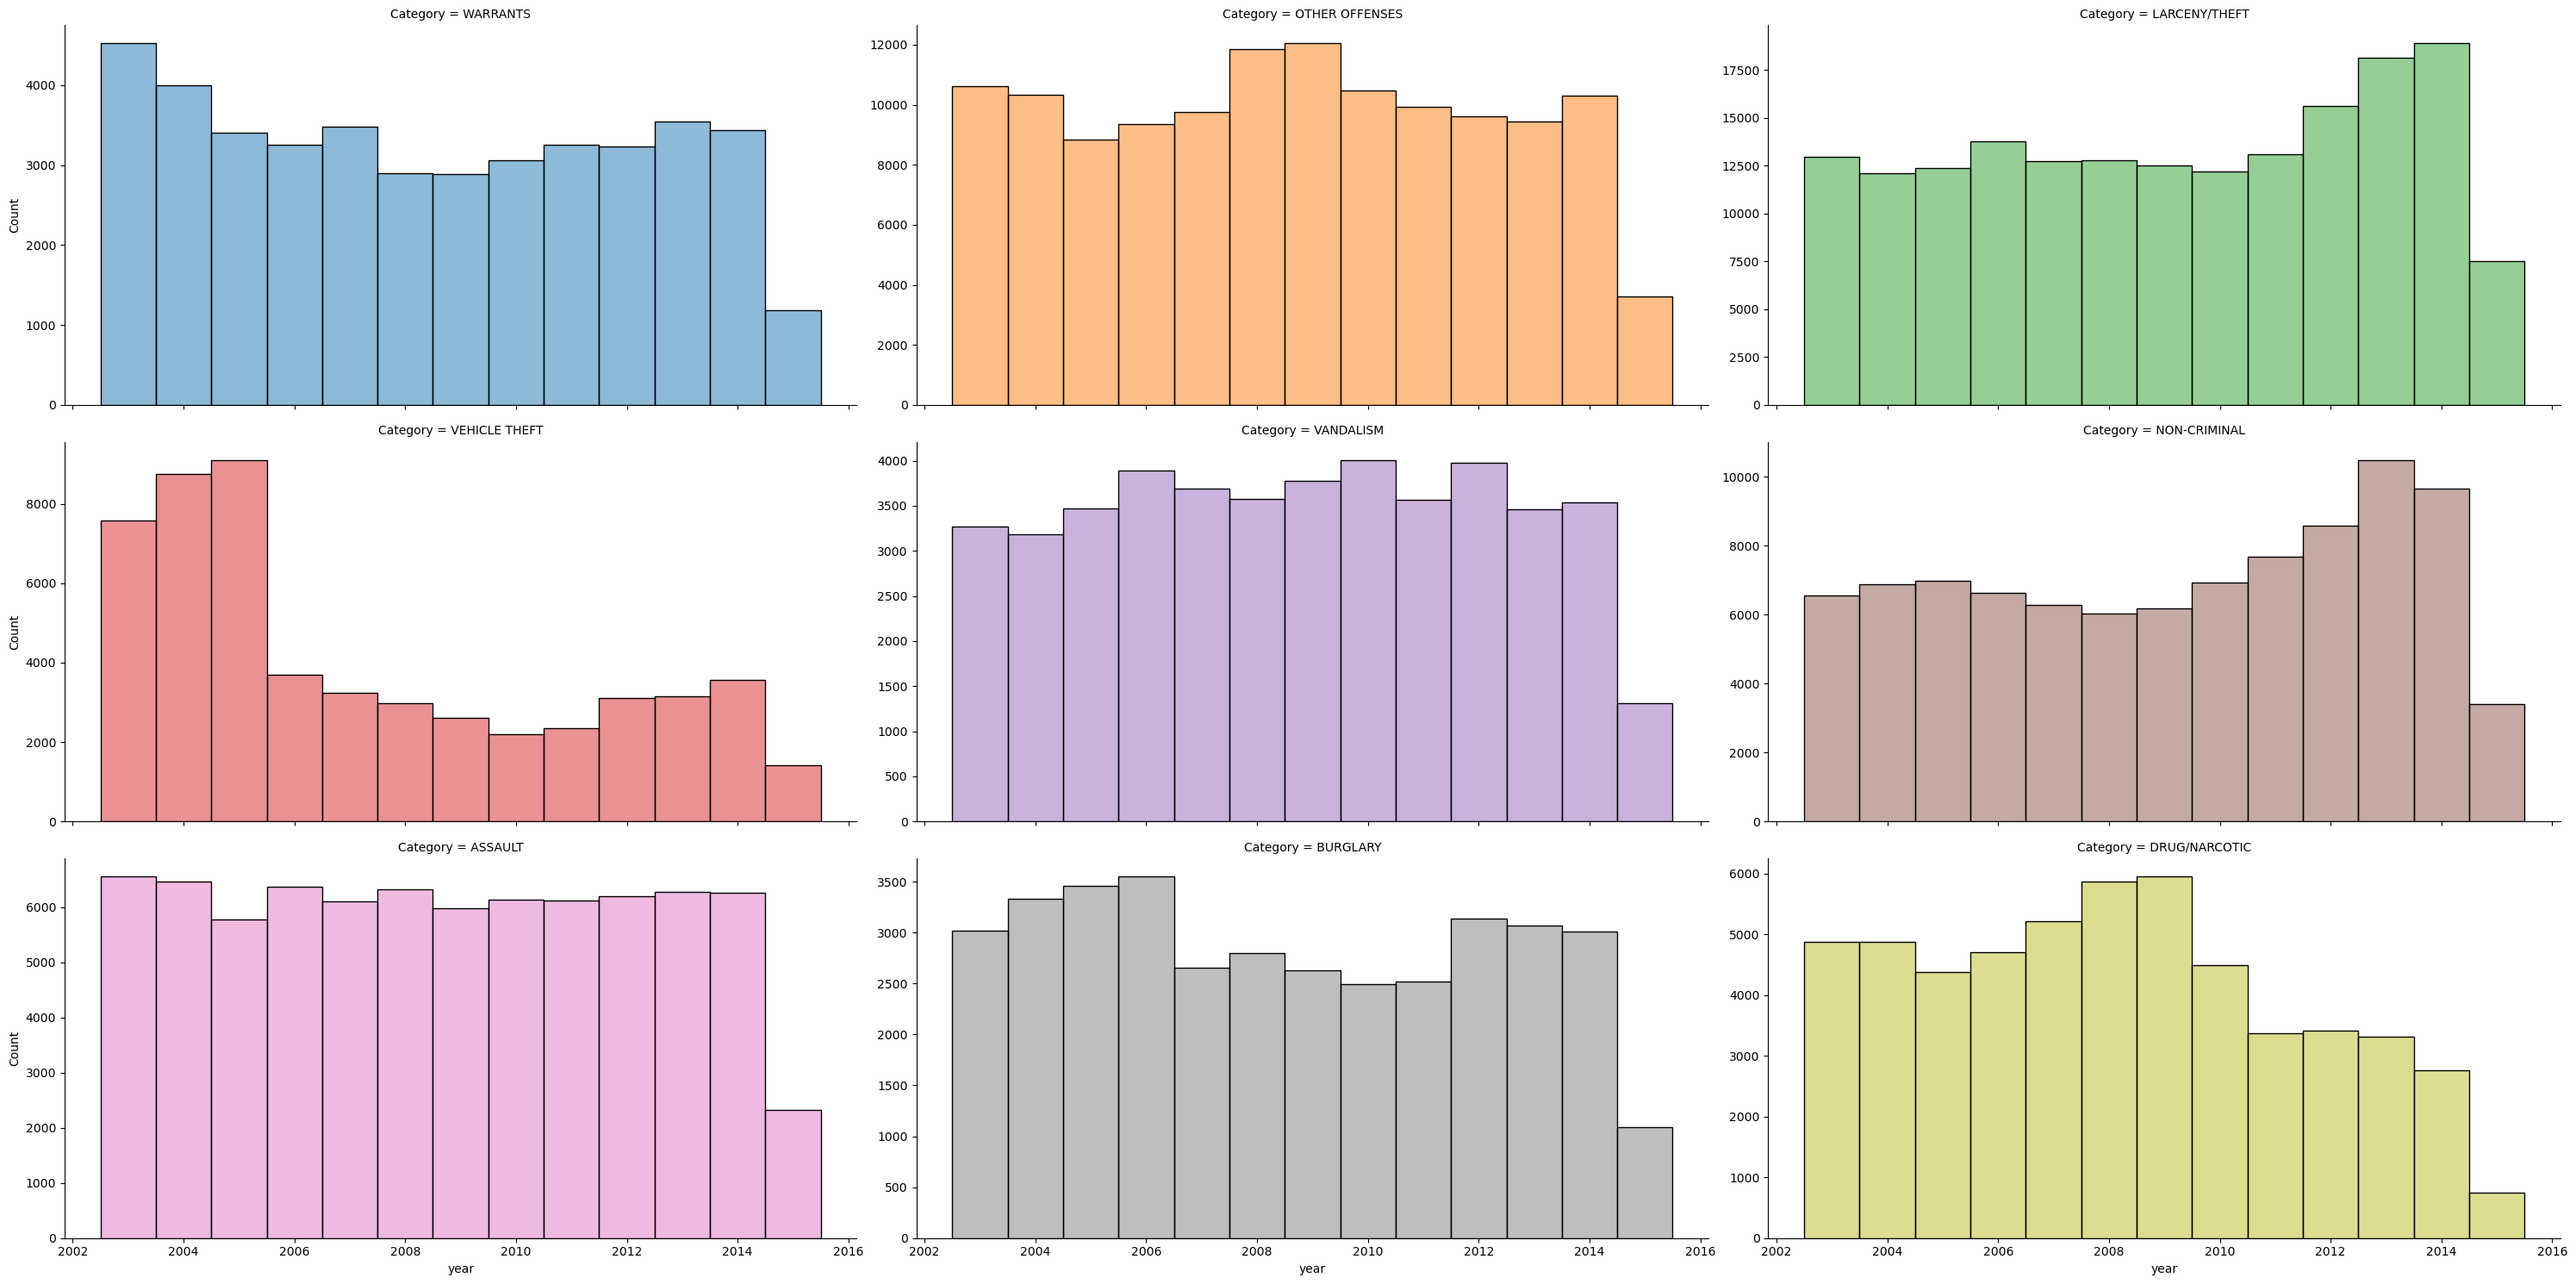

In [39]:
plt.figure(figsize = (640/2, 480/2))
top_categories = sf_data["Category"].value_counts().head(9).index 
top_cat_data = sf_data[sf_data["Category"].isin(top_categories)]
sns.displot(top_cat_data, x="year", col = "Category", col_wrap=3, aspect=2, hue="Category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
           label = "Top 9 crimes")
# save_figure("bar_year")
plt.show()

<Figure size 32000x24000 with 0 Axes>

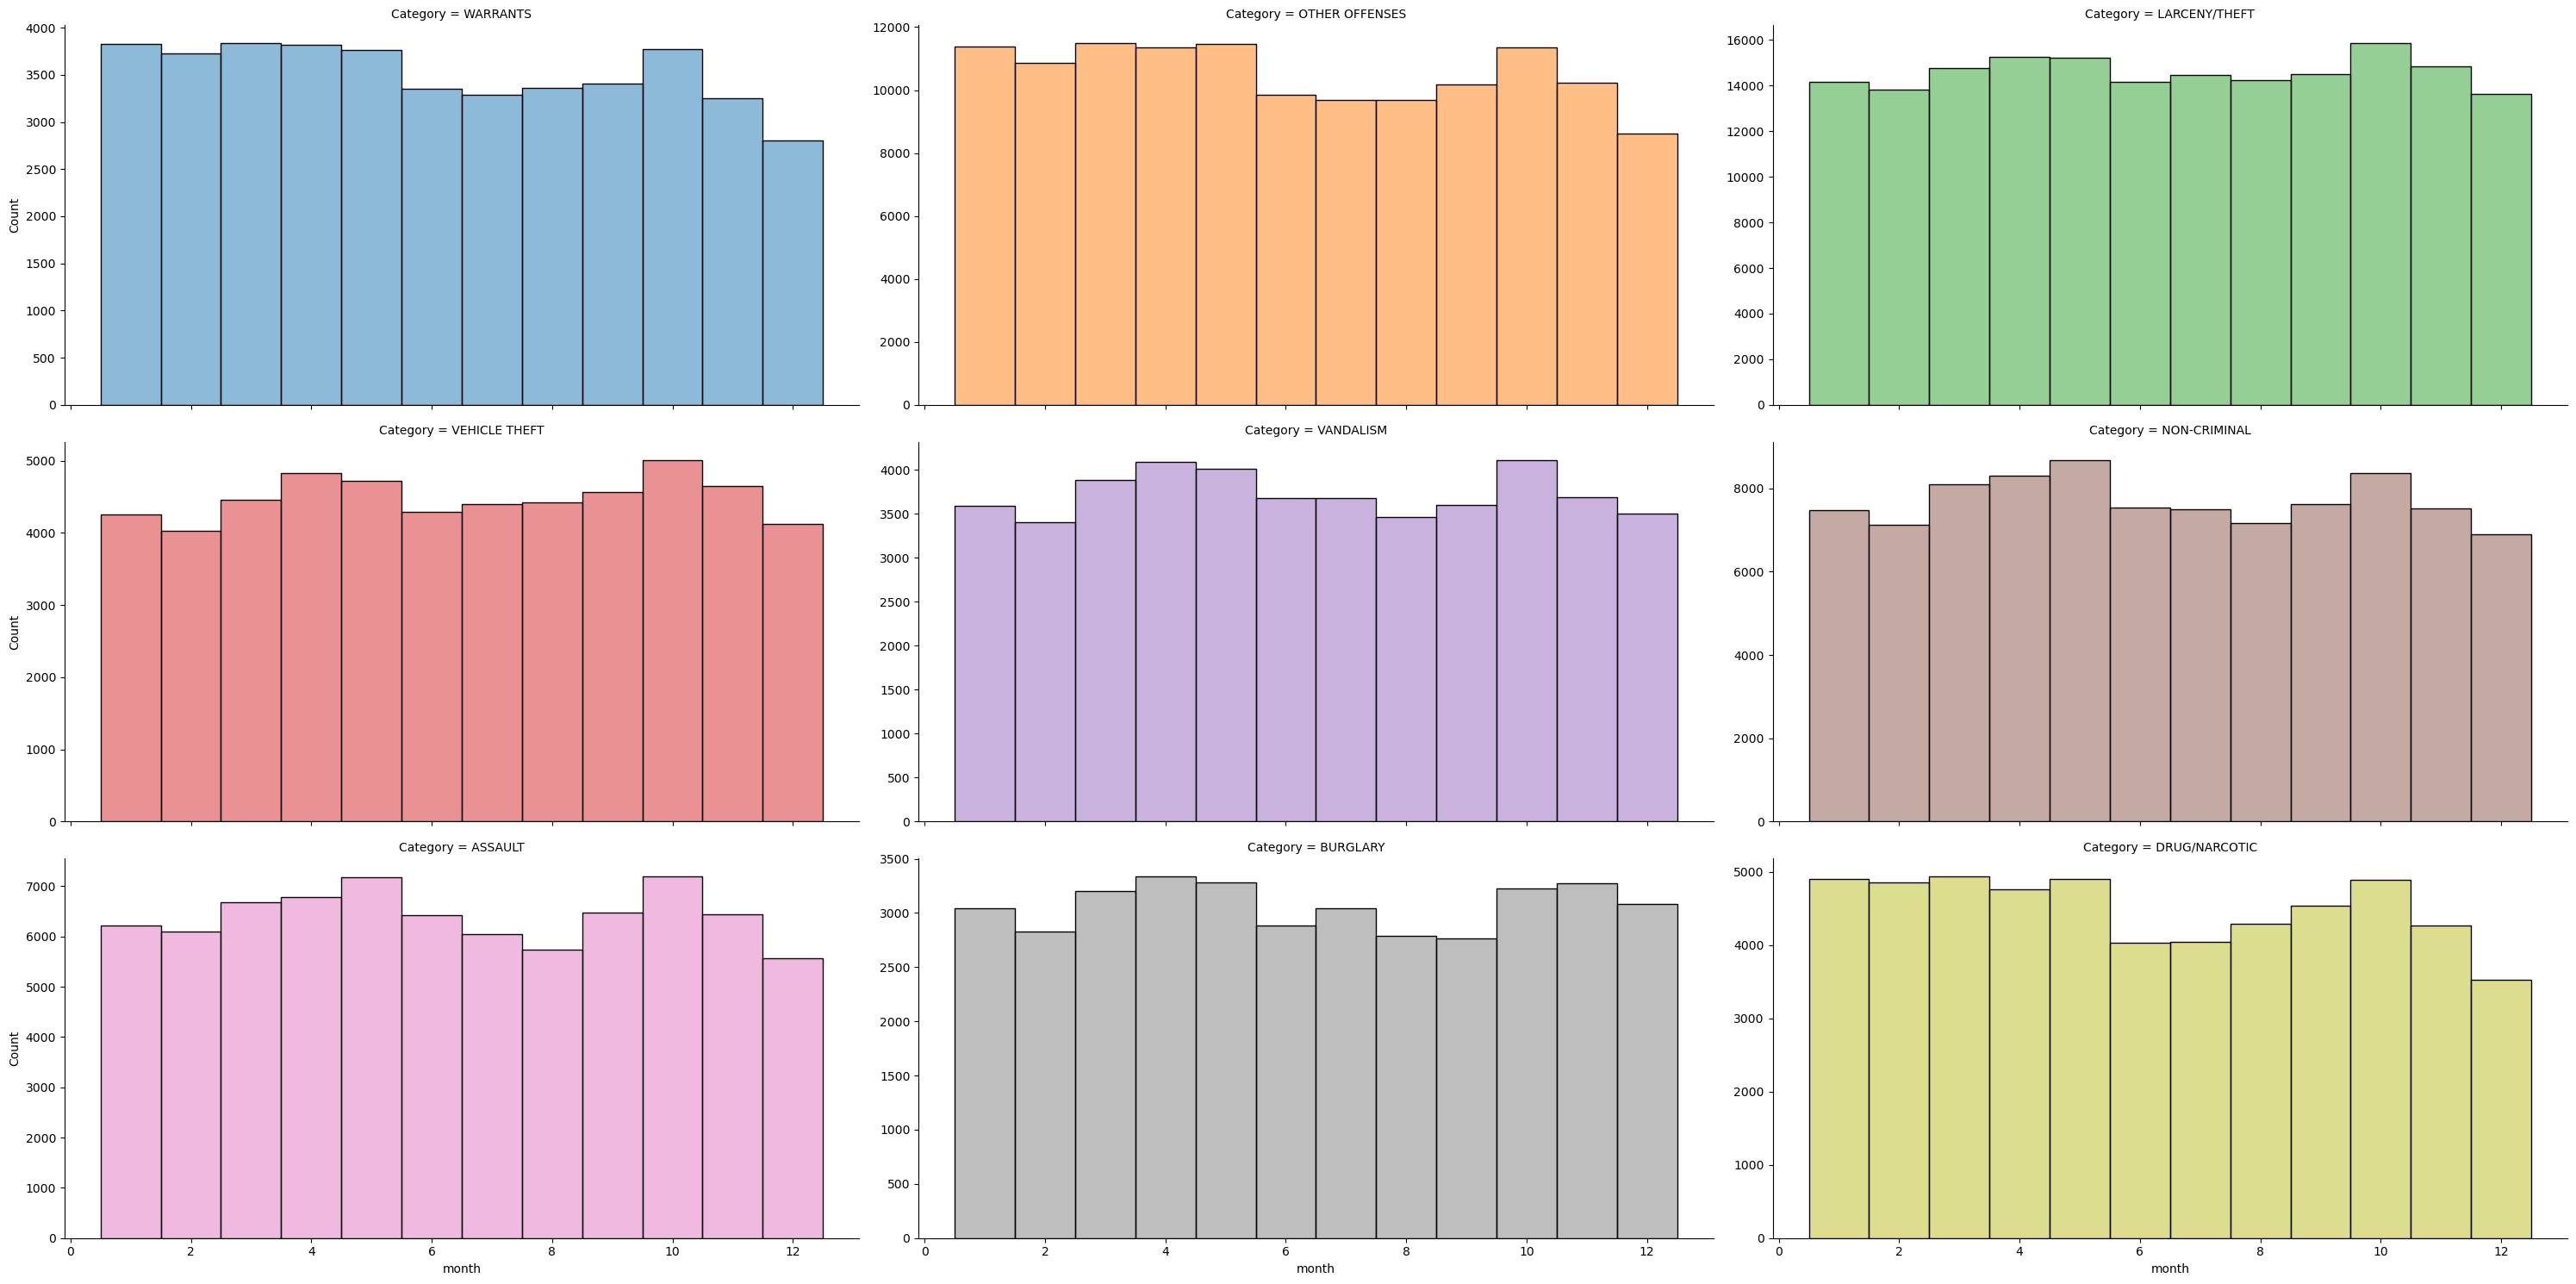

In [40]:
plt.figure(figsize = (640/2, 480/2))
top_categories = sf_data["Category"].value_counts().head(9).index 
top_cat_data = sf_data[sf_data["Category"].isin(top_categories)]
sns.displot(top_cat_data, x="month", col = "Category", col_wrap=3, aspect=2, hue="Category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
           label = "Top 9 crimes")
# save_figure("bar_month")
plt.show()

<Figure size 32000x24000 with 0 Axes>

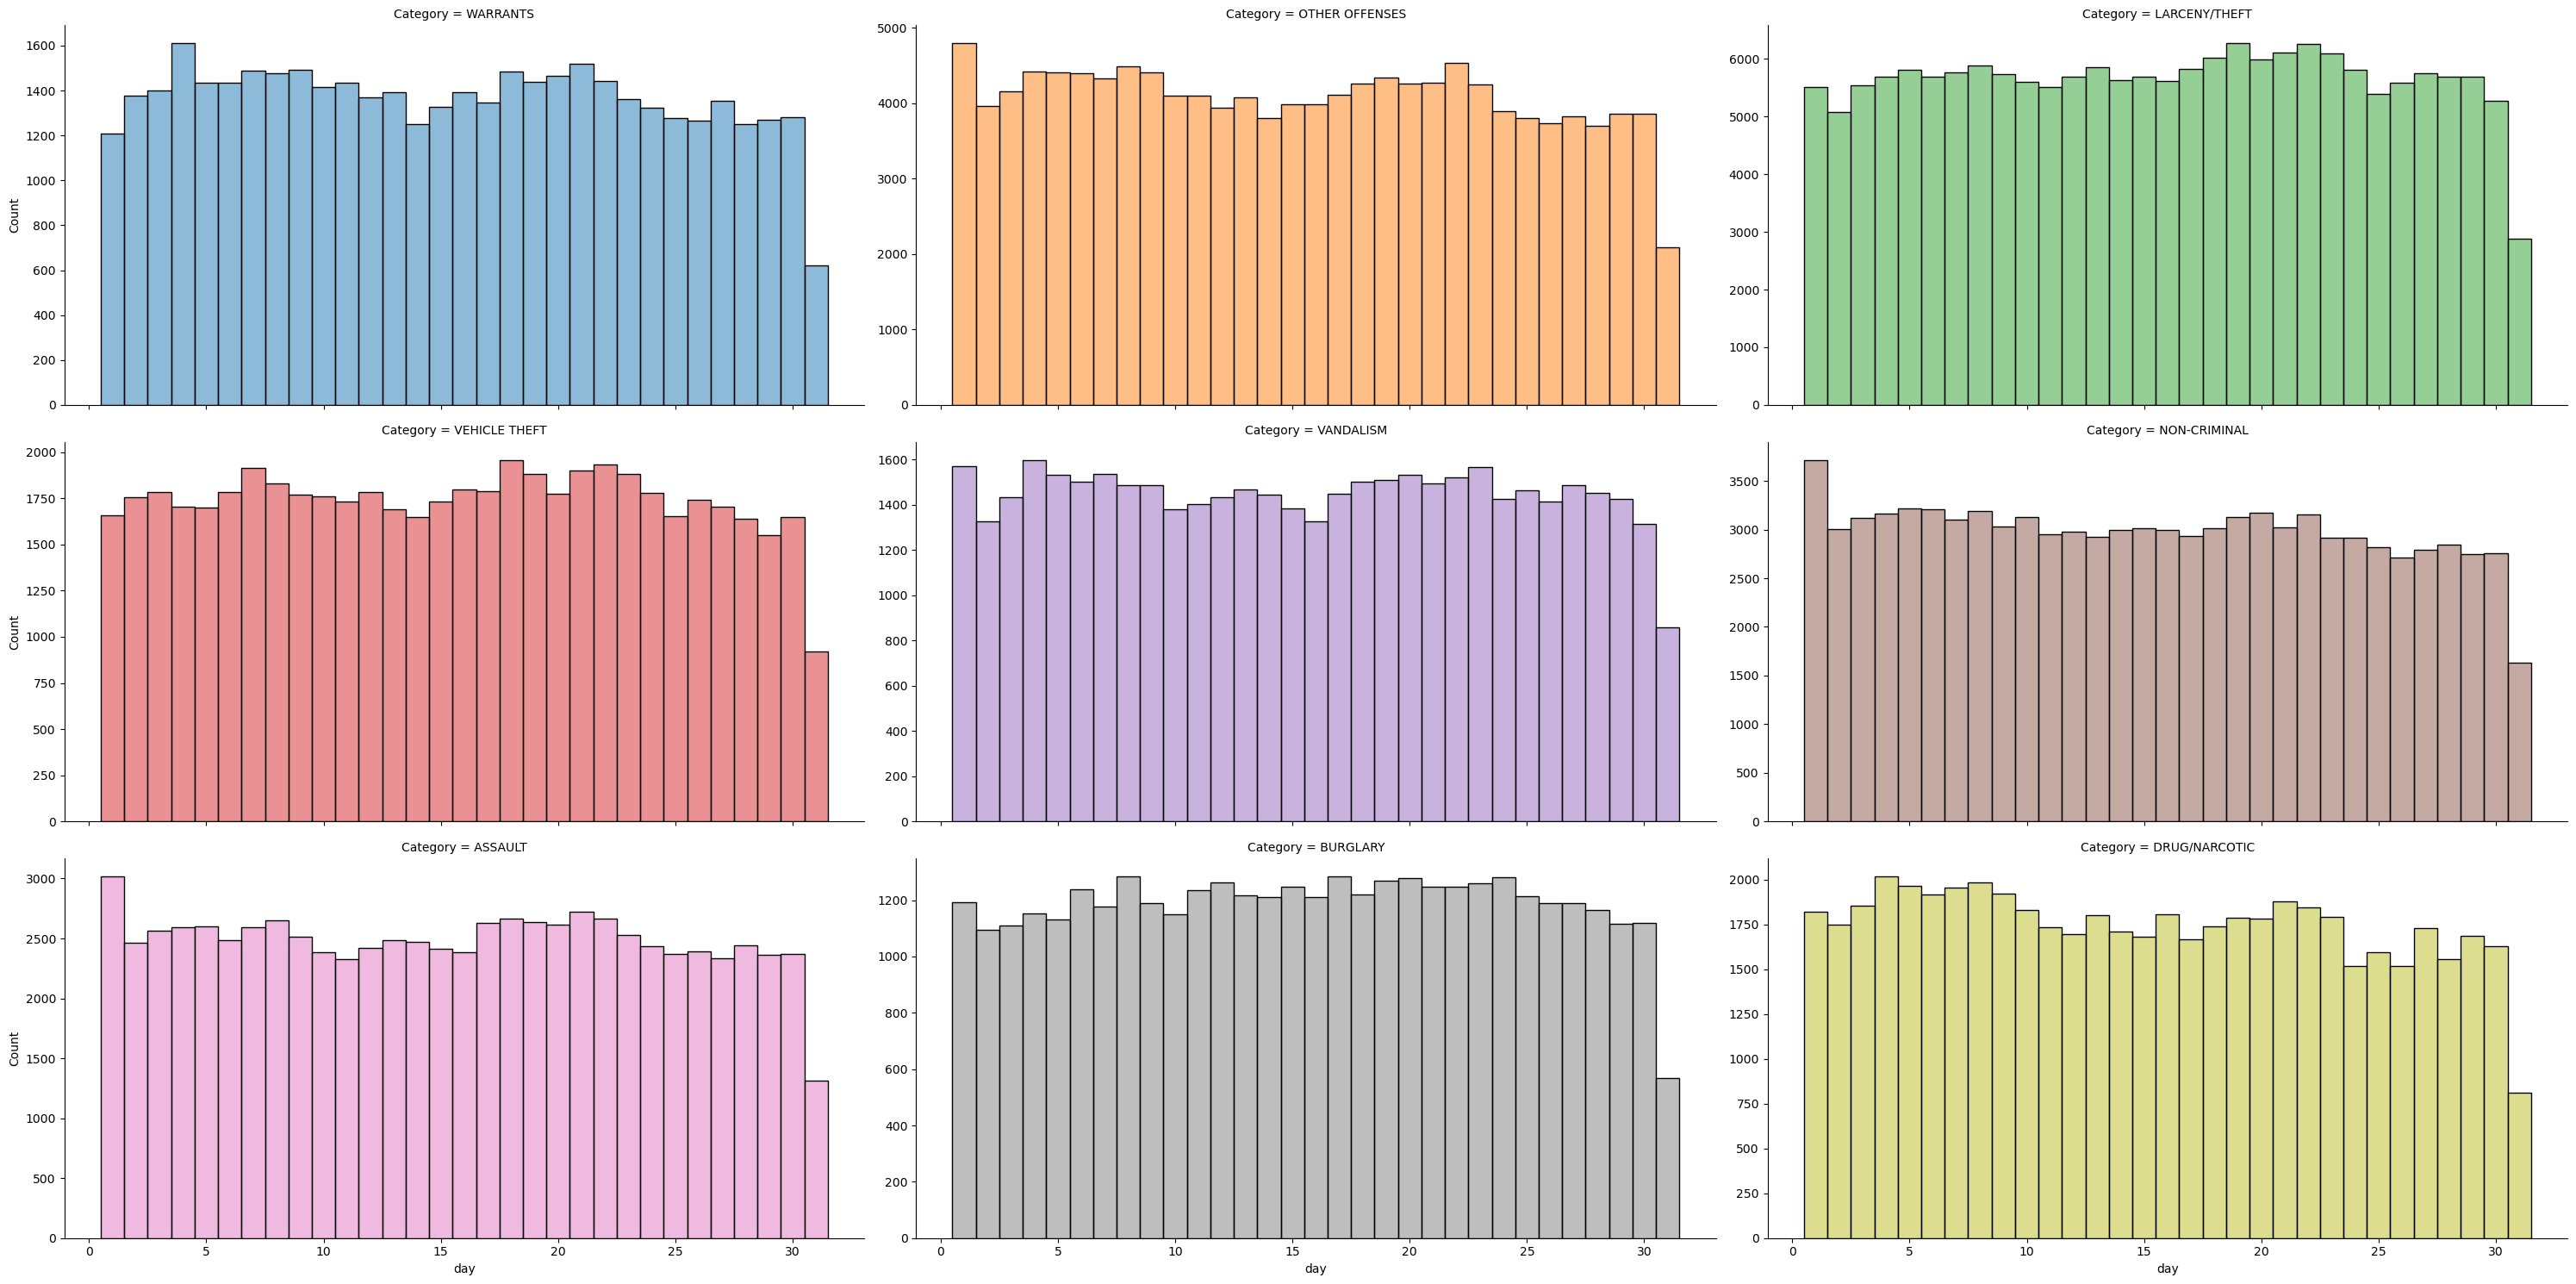

In [41]:
plt.figure(figsize = (640/2, 480/2))
top_categories = sf_data["Category"].value_counts().head(9).index 
top_cat_data = sf_data[sf_data["Category"].isin(top_categories)]
sns.displot(top_cat_data, x="day", col = "Category", col_wrap=3, aspect=2, hue="Category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
           label = "Top 9 crimes")
# save_figure("bar_day")
plt.show()

<Figure size 32000x24000 with 0 Axes>

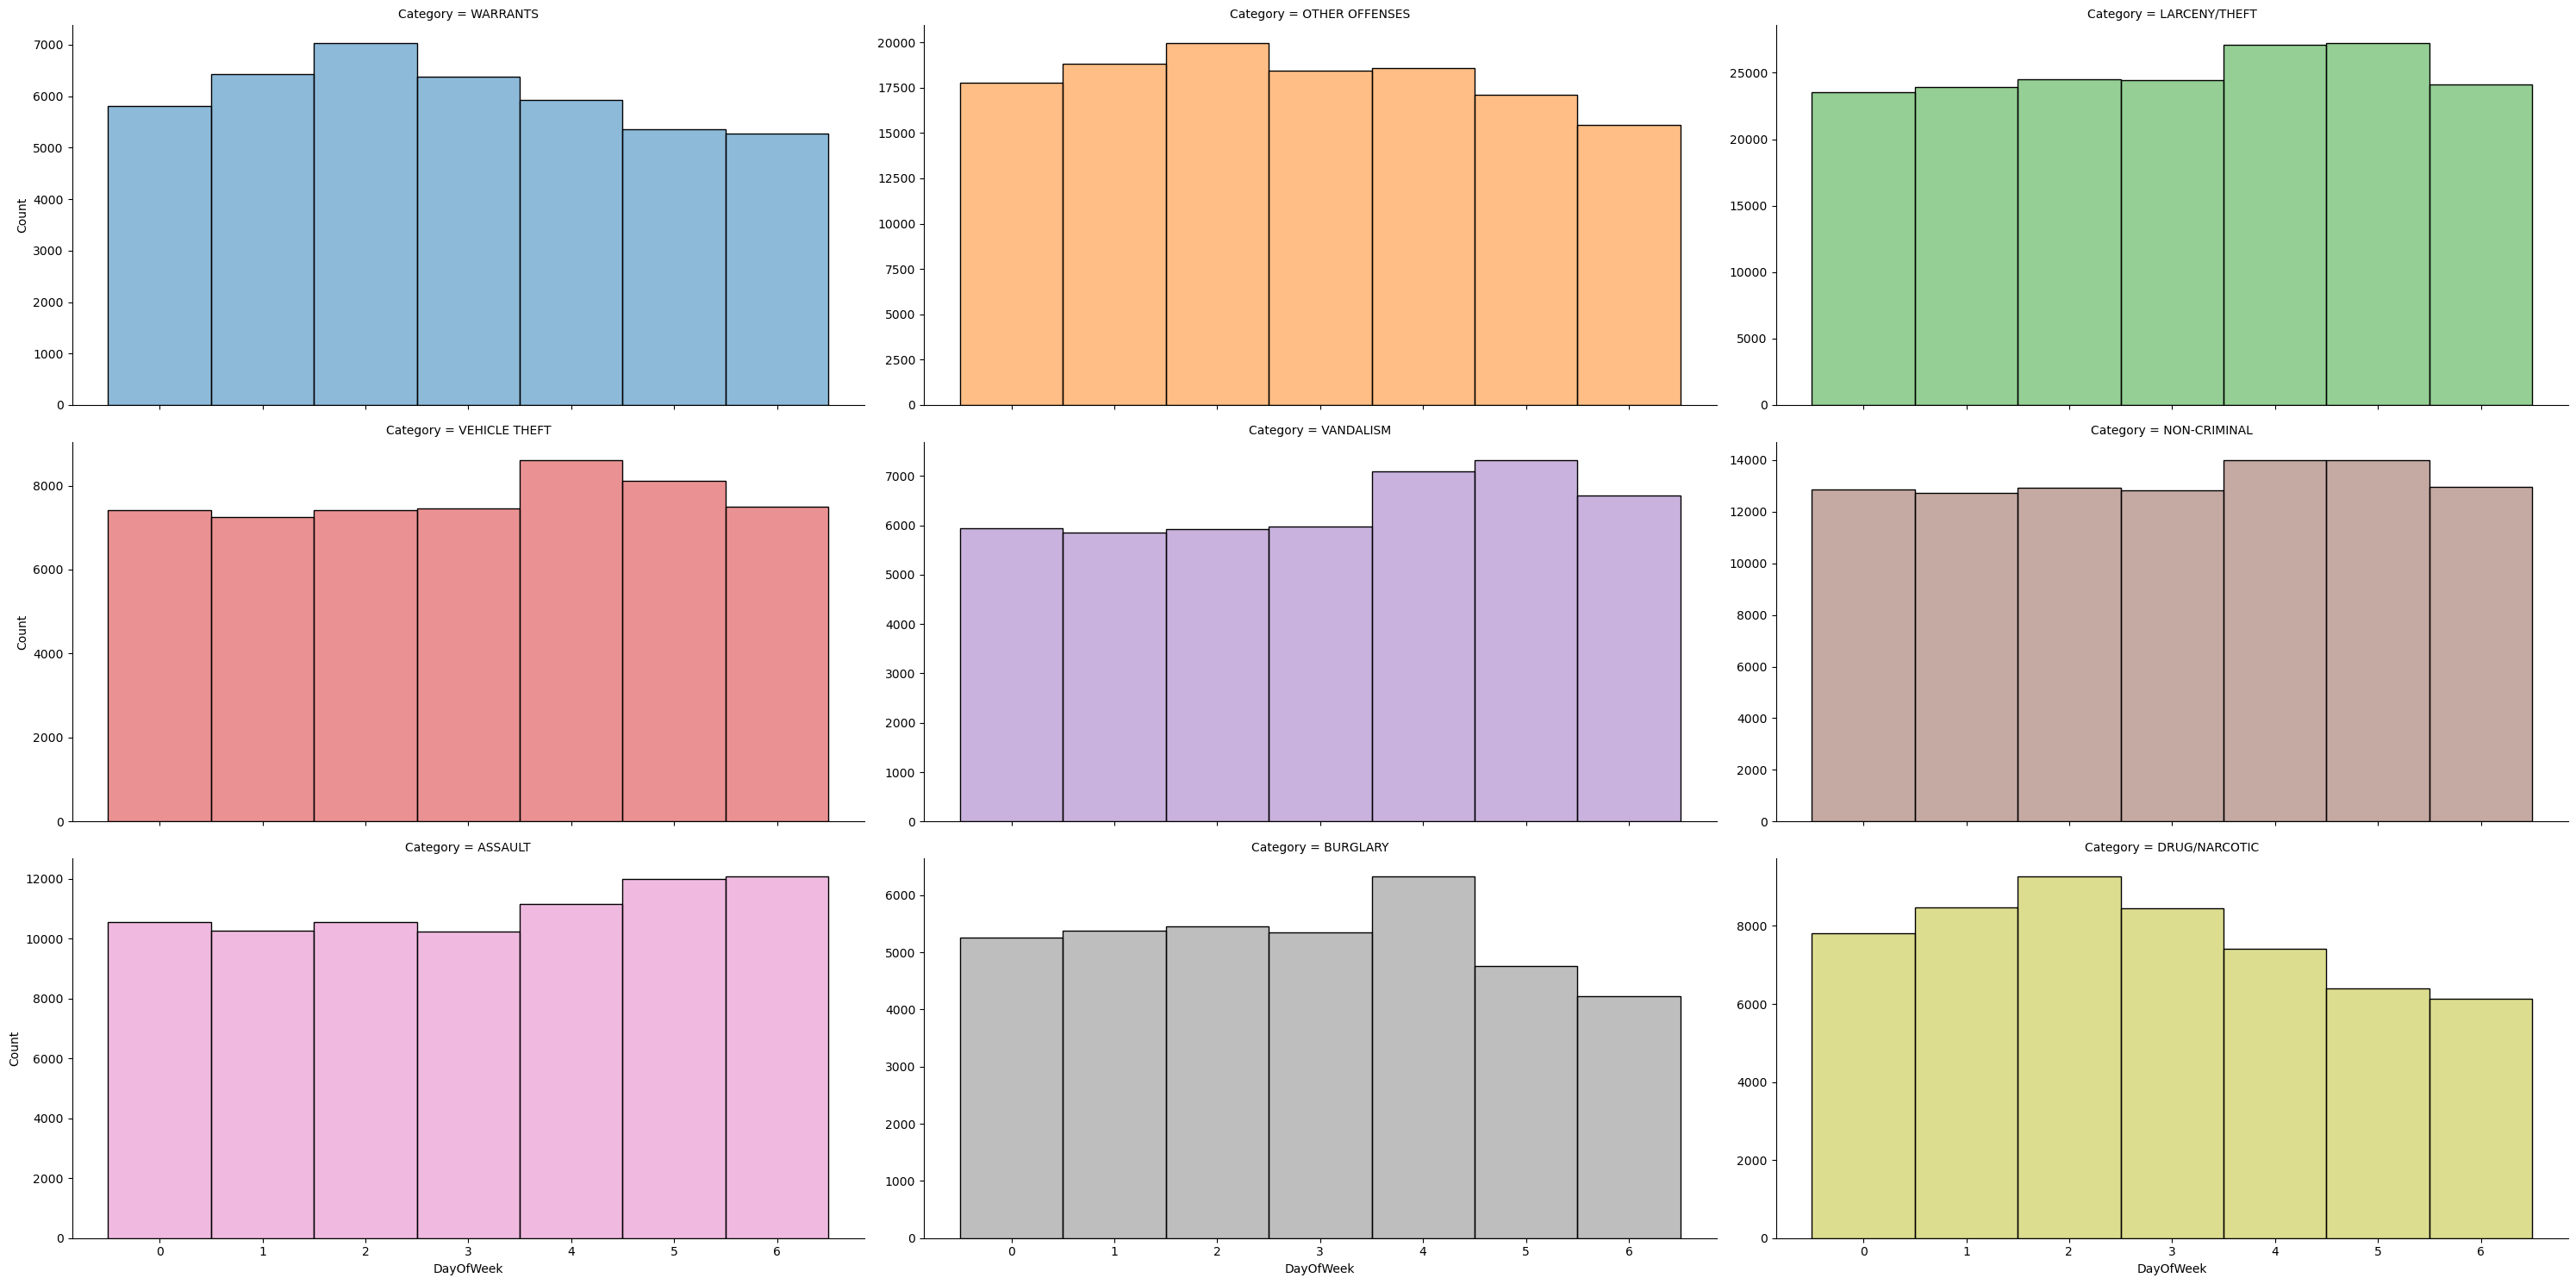

In [42]:
plt.figure(figsize = (640/2, 480/2))
top_categories = sf_data["Category"].value_counts().head(9).index 
top_cat_data = sf_data[sf_data["Category"].isin(top_categories)]
sns.displot(top_cat_data, x="DayOfWeek", col = "Category", col_wrap=3, aspect=2, hue="Category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
           label = "Top 9 crimes")
# save_figure("bar_weekDay")
plt.show()

In [33]:
def crime_point_plot(var, ax, data = top_cat_data):
    sns.pointplot(
        data.groupby(["Category", var])["Dates"].count().reset_index().rename(columns={"Dates":"n"}),
            x=var, y="n", hue = "Category", ax = ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([],[], frameon = False)
    ax.set_ylim(0)
    ax.set_ylabel("")
    return handles, labels

Saving figure to file ./cs5630_final_TeX/figures/cat_bars.pdf


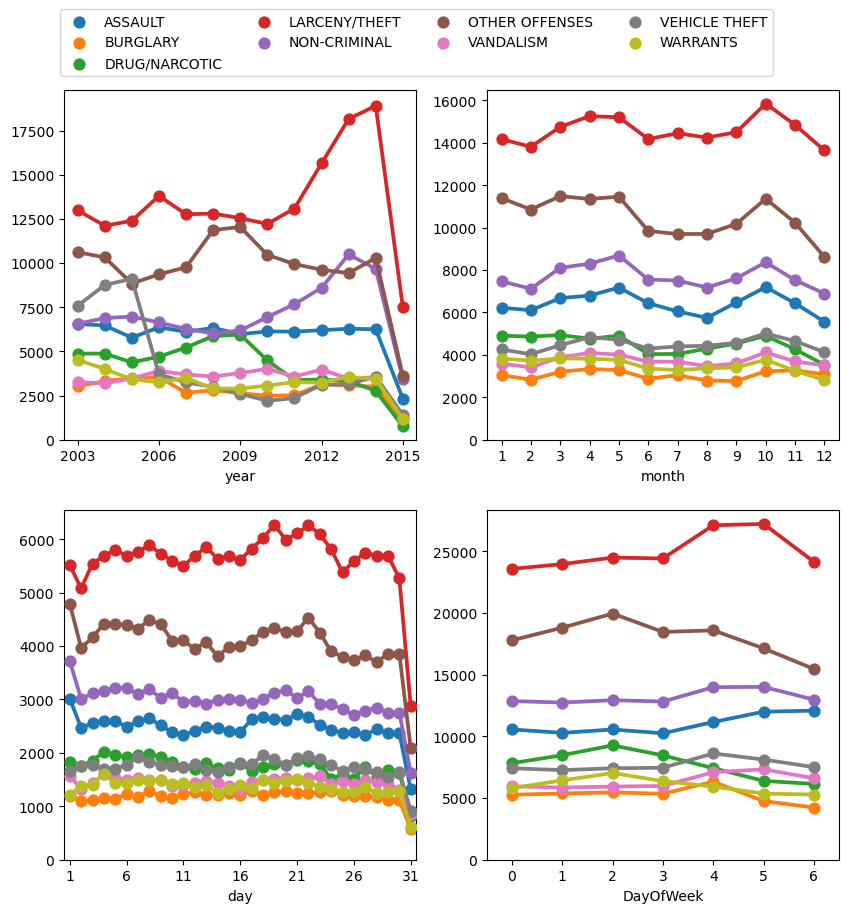

In [193]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (10,10))
handles, labels = crime_point_plot(var = "year", ax=axes[0][0])
axes[0][0].set_xticks(range(0,13, 3))
crime_point_plot(var = "month", ax=axes[0][1])
crime_point_plot(var = "day", ax=axes[1][0])
axes[1][0].set_xticks(range(0,32, 5))
crime_point_plot(var = "DayOfWeek", ax=axes[1][1])
#
plt.legend(handles, labels, loc = "upper center", bbox_to_anchor=(-0.2, 2.45), ncol = 4)
# plt.tight_layout()
# save_figure("cat_bars")

In [122]:
def scaled_crime_point_plot(var, ax, data = top_cat_data):
    var_data = data.groupby(["Category", var])["Dates"].count().reset_index().rename(columns={"Dates":"n"})
    max_dict = {r[0]:r[1] for r in var_data.groupby("Category")["n"].max().reset_index().to_numpy()}
    var_data["scaled"] = var_data.apply(lambda r: r["n"]/max_dict[r["Category"]], axis = 1)
    sns.pointplot(
        var_data,
        x=var, y="scaled", hue = "Category", ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([],[], frameon = False)
    ax.set_ylim(0, 1.2)
    ax.set_ylabel("")
    return handles, labels

Saving figure to file ./cs5630_final_TeX/figures/scaled_cat_bars.pdf


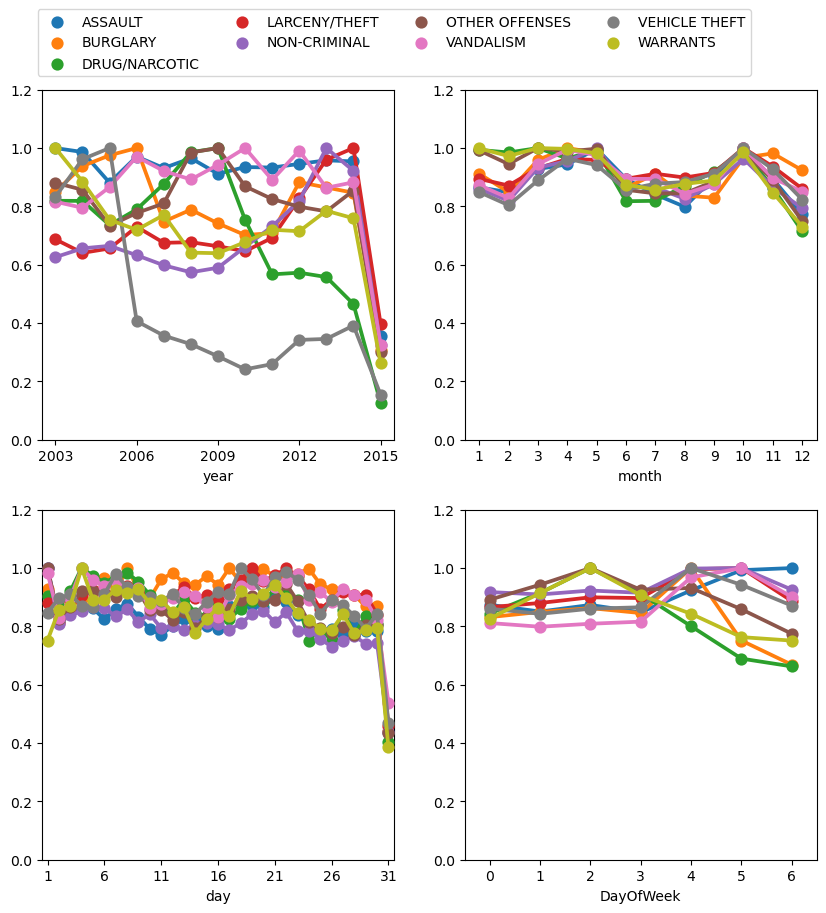

In [194]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (10,10))
handles, labels = scaled_crime_point_plot(var = "year", ax=axes[0][0])
axes[0][0].set_xticks(range(0,13, 3))
scaled_crime_point_plot(var = "month", ax=axes[0][1])
scaled_crime_point_plot(var = "day", ax=axes[1][0])
axes[1][0].set_xticks(range(0,32, 5))
scaled_crime_point_plot(var = "DayOfWeek", ax=axes[1][1])
#
plt.legend(handles, labels, loc = "upper center", bbox_to_anchor=(-0.2, 2.45), ncol = 4)
#plt.tight_layout()
save_figure("scaled_cat_bars")

In [295]:
sf_data["resp"] = sf_data["violent"].map({True:"violent", False:"non-violent"})
def vNv_point_plot(var, ax, data = sf_data):
    counts_data = sf_data.groupby([var, "violent", "resp"])["Dates"].count().reset_index().rename(columns={"Dates":"n"})
    mean_dict = counts_data.groupby("violent")["n"].mean()
    counts_data["scaled"] = counts_data.apply(lambda r: r["n"]/mean_dict[r["violent"]], axis = 1)
    sns.pointplot(data=counts_data, x=var, y="scaled", hue="resp", ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([],[], frameon = False)
    ax.set_ylim(0)
    ax.set_ylabel("")
    return handles, labels

Saving figure to file ./cs5630_final_TeX/figures/vNv_point.pdf


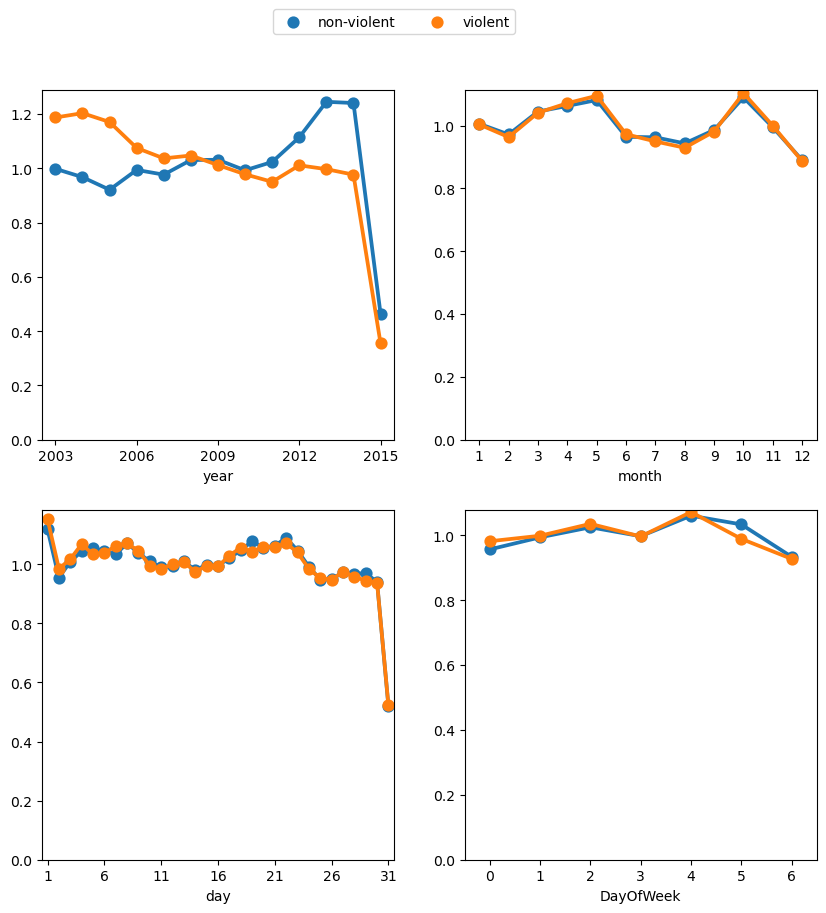

In [299]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (10,10))
handles, labels = vNv_point_plot(var = "year", ax=axes[0][0])
axes[0][0].set_xticks(range(0,13, 3))
vNv_point_plot(var = "month", ax=axes[0][1])
vNv_point_plot(var = "day", ax=axes[1][0])
axes[1][0].set_xticks(range(0,32, 5))
vNv_point_plot(var = "DayOfWeek", ax=axes[1][1])
#
plt.legend(handles, labels, loc = "upper center", bbox_to_anchor=(-0.2, 2.45), ncol = 4)
#plt.tight_layout()
save_figure("vNv_point")

Saving figure to file ./cs5630_final_TeX/figures/hist_str1.pdf


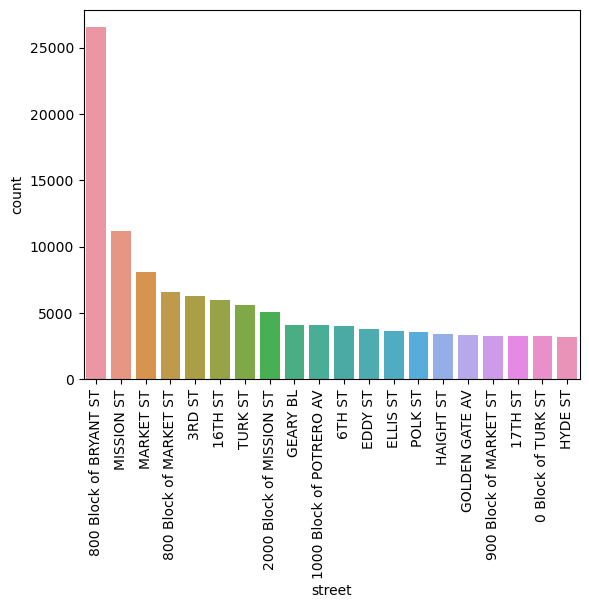

In [137]:
str1_counts =sf_data["street1"].value_counts().head(20).reset_index().rename(columns={"index":"street", "street1":"count"})
sns.barplot(data=str1_counts, x="street", y="count")
plt.xticks(rotation=90)
save_figure("hist_str1")
plt.show()

Saving figure to file ./cs5630_final_TeX/figures/hist_str2.pdf


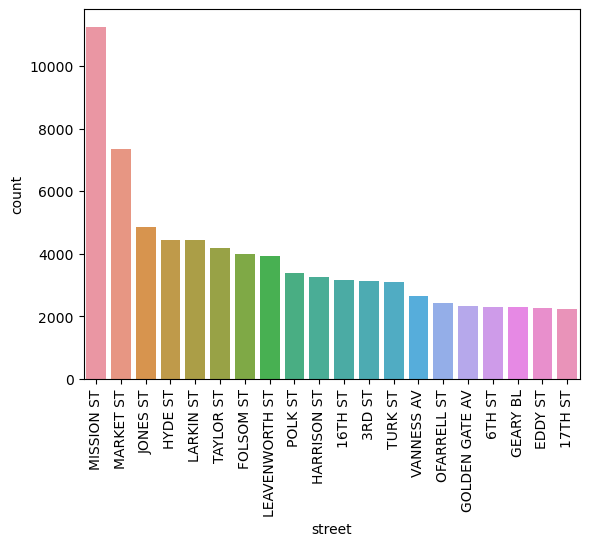

In [138]:
str2_counts =sf_data["street2"].value_counts().head(20).reset_index().rename(columns={"index":"street", "street2":"count"})
sns.barplot(data=str2_counts, x="street", y="count")
plt.xticks(rotation=90)
save_figure("hist_str2")
plt.show()


In [157]:
sf_data.sample(frac=0.03).shape[0]/20000

1.31695

Saving figure to file ./cs5630_final_TeX/figures/XY.pdf


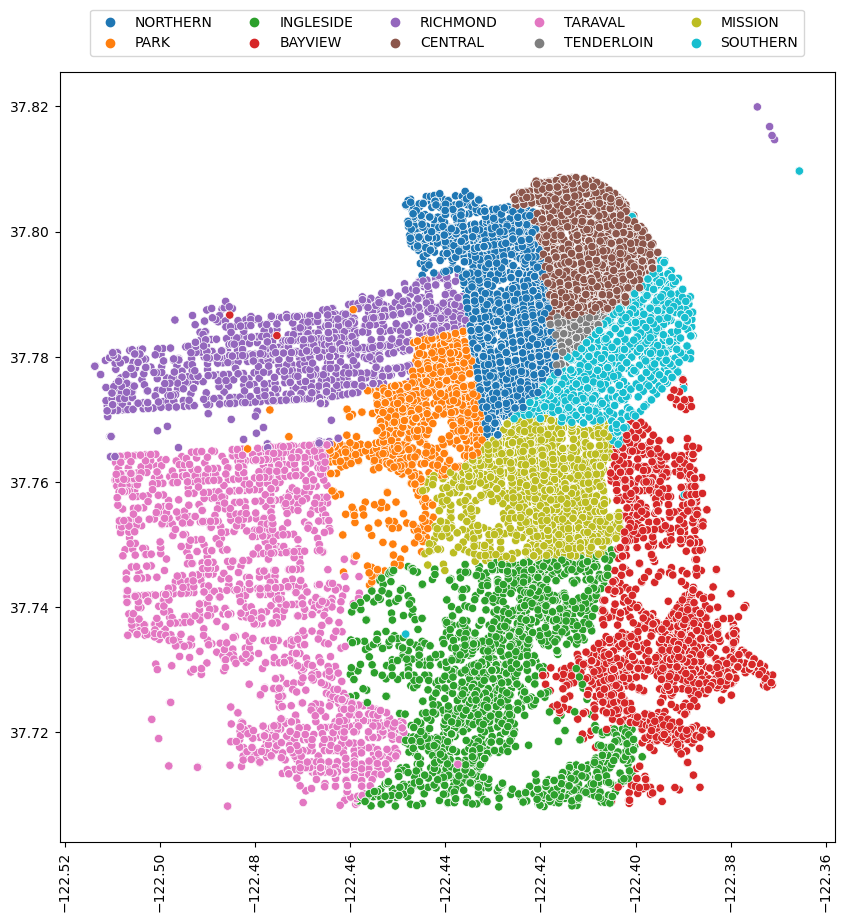

In [288]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = sf_data.iloc[1:40000,], x="X", y="Y", hue = "PdDistrict")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("")
plt.legend(handles, labels, loc = "upper center", bbox_to_anchor=(0.5, 1.09), ncol = 5)
save_figure("XY")
plt.show()

In [211]:
for c in sf_data[sf_data["violent"]==True]["Category"].drop_duplicates():
    print(c, end=", ")

WARRANTS, VEHICLE THEFT, VANDALISM, ROBBERY, ASSAULT, WEAPON LAWS, BURGLARY, SUSPICIOUS OCC, FORGERY/COUNTERFEITING, DRUG/NARCOTIC, TRESPASS, MISSING PERSON, FRAUD, KIDNAPPING, SEX OFFENSES FORCIBLE, DISORDERLY CONDUCT, ARSON, SEX OFFENSES NON FORCIBLE, 

In [215]:
sf_data.groupby("violent")["Dates"].count()

violent
False    433408
True     444574
Name: Dates, dtype: int64

In [212]:
for c in sf_data[sf_data["violent"]==False]["Category"].drop_duplicates():
    print(c, end=", ")

OTHER OFFENSES, LARCENY/THEFT, NON-CRIMINAL, DRUNKENNESS, STOLEN PROPERTY, SECONDARY CODES, RUNAWAY, DRIVING UNDER THE INFLUENCE, PROSTITUTION, FAMILY OFFENSES, LIQUOR LAWS, BRIBERY, EMBEZZLEMENT, SUICIDE, LOITERING, EXTORTION, GAMBLING, BAD CHECKS, TREA, RECOVERED VEHICLE, PORNOGRAPHY/OBSCENE MAT, 

<AxesSubplot: xlabel='X', ylabel='Y'>

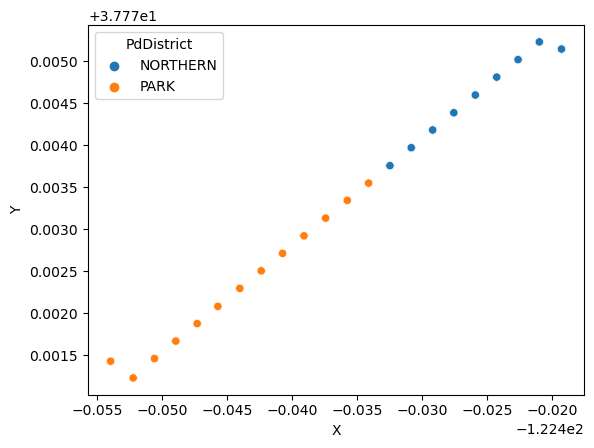

In [114]:
small_data = sf_data.query("str1=='OAK ST'")
sns.scatterplot(
    data = small_data,
    x="X", y="Y", hue = "PdDistrict")

# Mont Real

In [2]:
mt_data = pd.read_csv("../data/cleaned_data/MontReal.csv")
mt_data.dtypes

Unnamed: 0         int64
category          object
date              object
postal_code       object
city              object
neighbourhood     object
year               int64
count              int64
longitude        float64
latitude         float64
month              int64
day                int64
hour               int64
DayOfWeek          int64
postal_code_1     object
postal_code_2     object
pc1               object
pc2               object
violent             bool
dtype: object

In [4]:
mt_data["category"].value_counts()

Home Invasion                      43354
Theft in / from a motor vehicle    35382
Mischief                           31385
Motor vehicle theft                18723
Confirmed Theft                     7676
Offenses resulting in death          122
Name: category, dtype: int64

<Figure size 23040x17280 with 0 Axes>

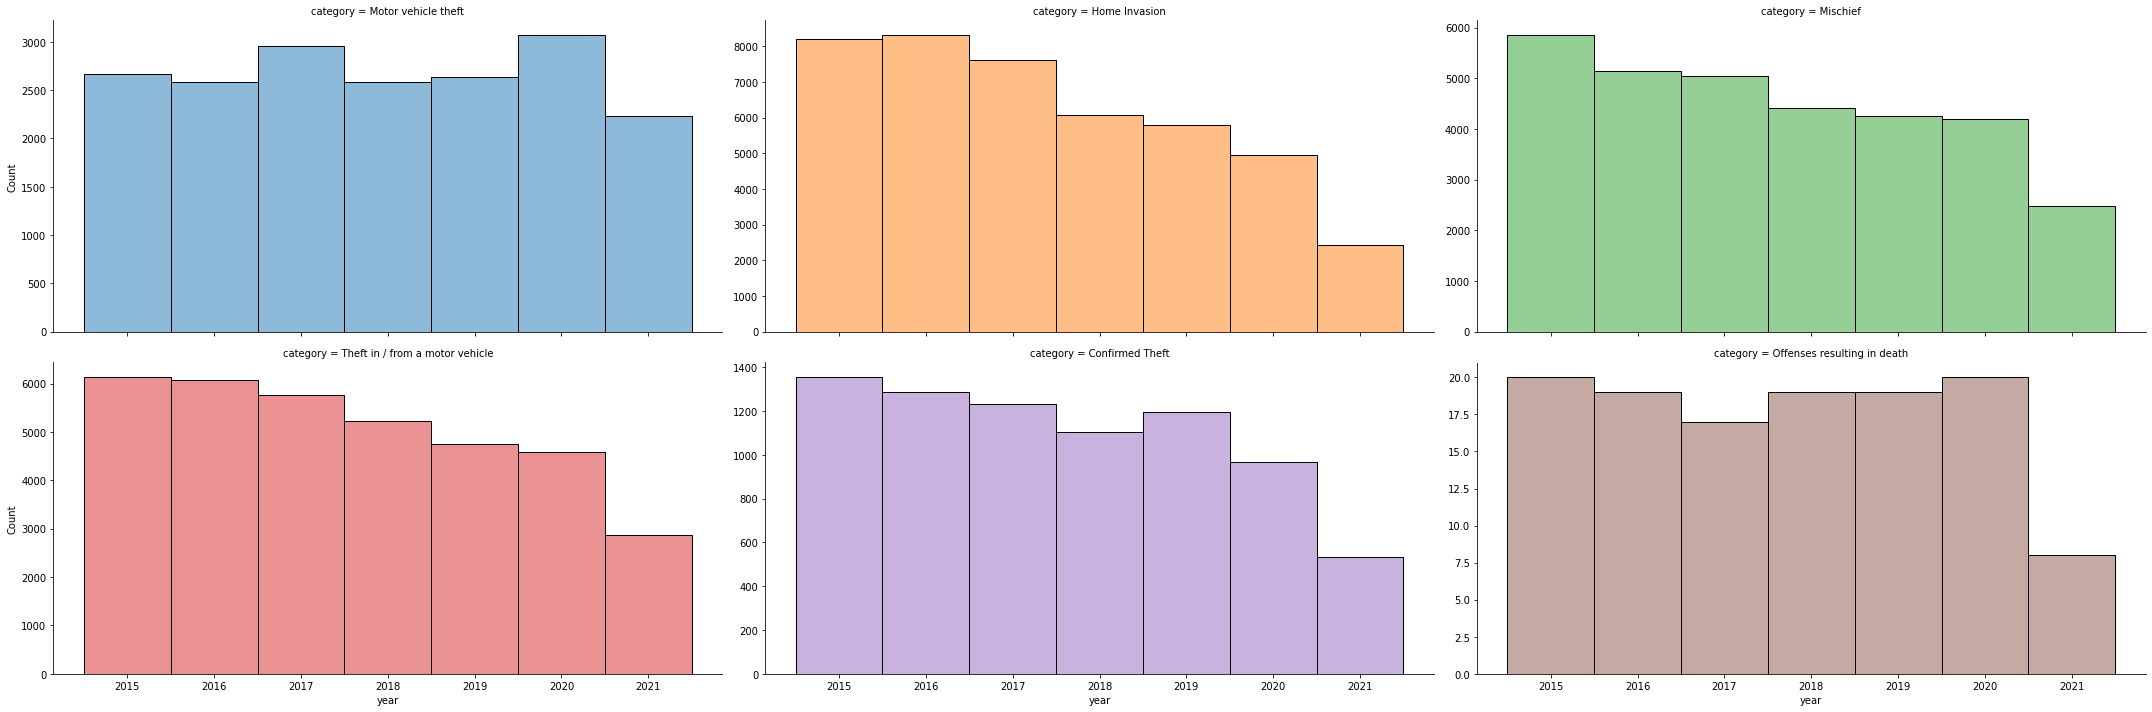

In [9]:
plt.figure(figsize = (640/2, 480/2))
sns.displot(mt_data, x="year", col = "category", col_wrap=3, aspect=2, hue="category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
)
plt.show()

<Figure size 23040x17280 with 0 Axes>

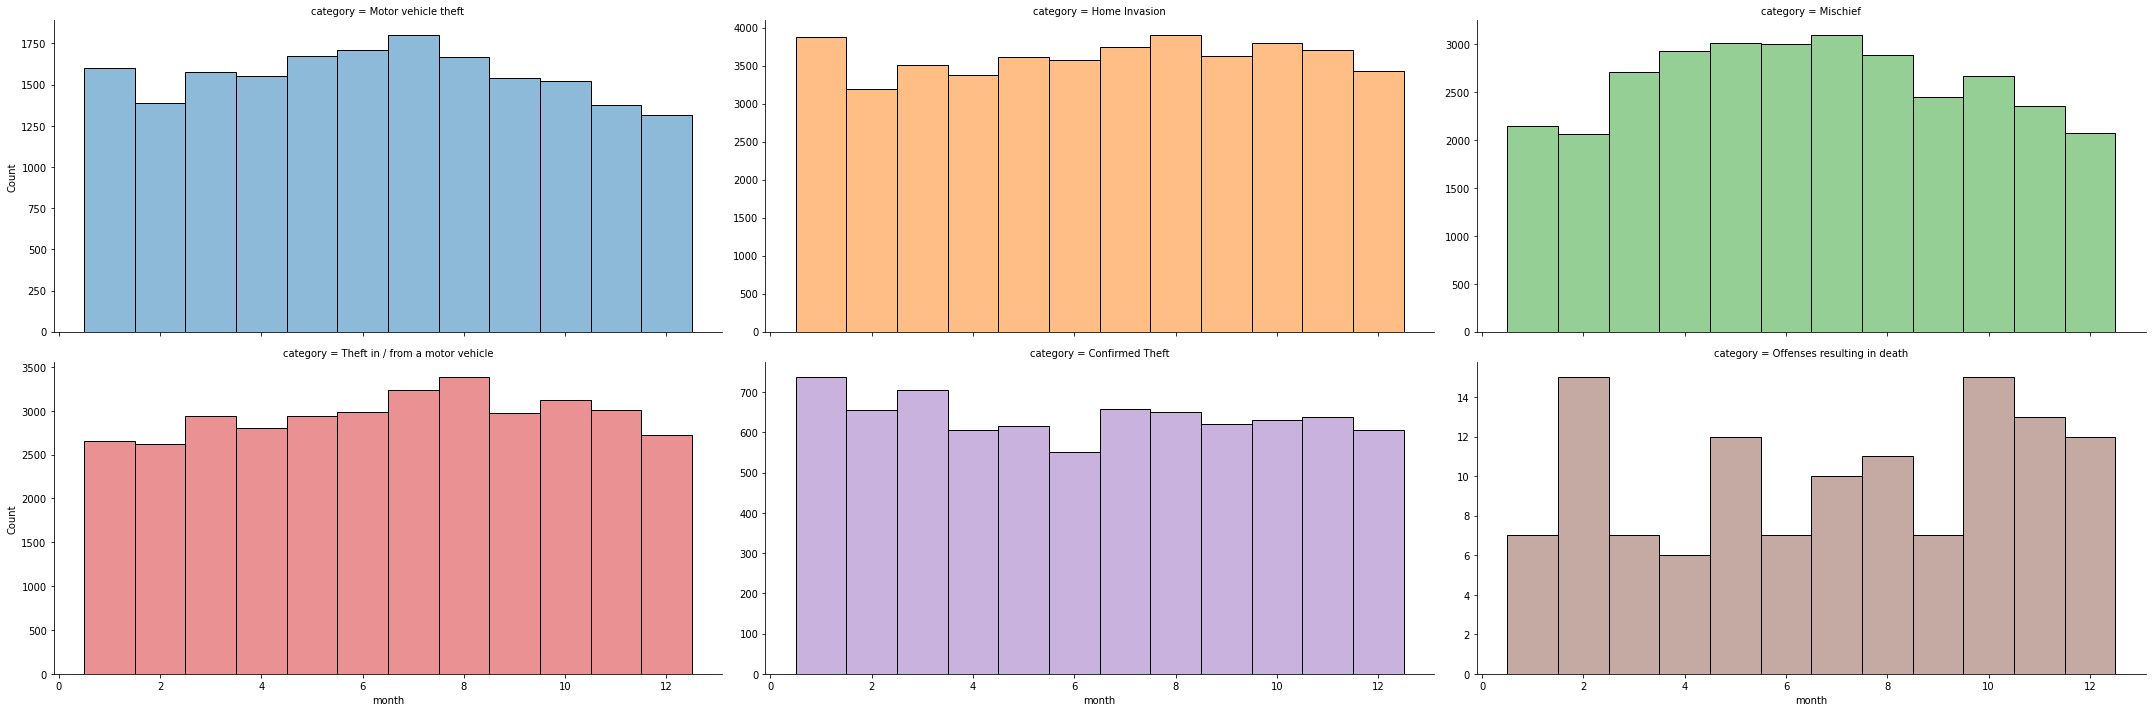

In [8]:
plt.figure(figsize = (640/2, 480/2))
sns.displot(mt_data, x="month", col = "category", col_wrap=3, aspect=2, hue="category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
)
plt.show()

<Figure size 23040x17280 with 0 Axes>

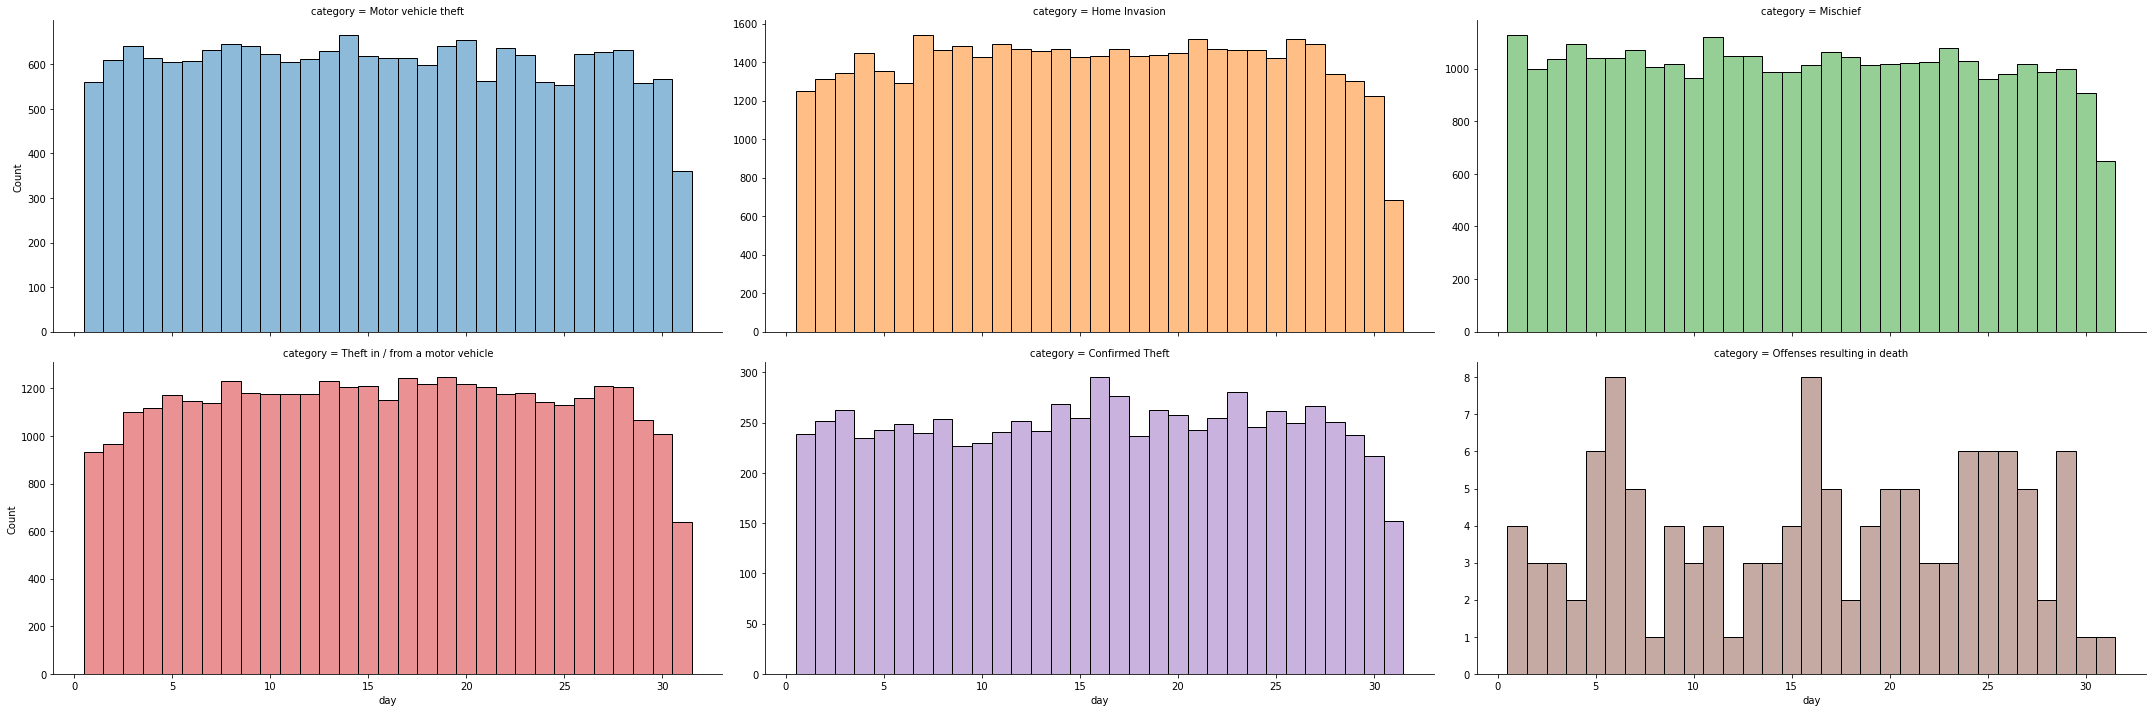

In [10]:
plt.figure(figsize = (640/2, 480/2))
sns.displot(mt_data, x="day", col = "category", col_wrap=3, aspect=2, hue="category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
)
plt.show()

<Figure size 23040x17280 with 0 Axes>

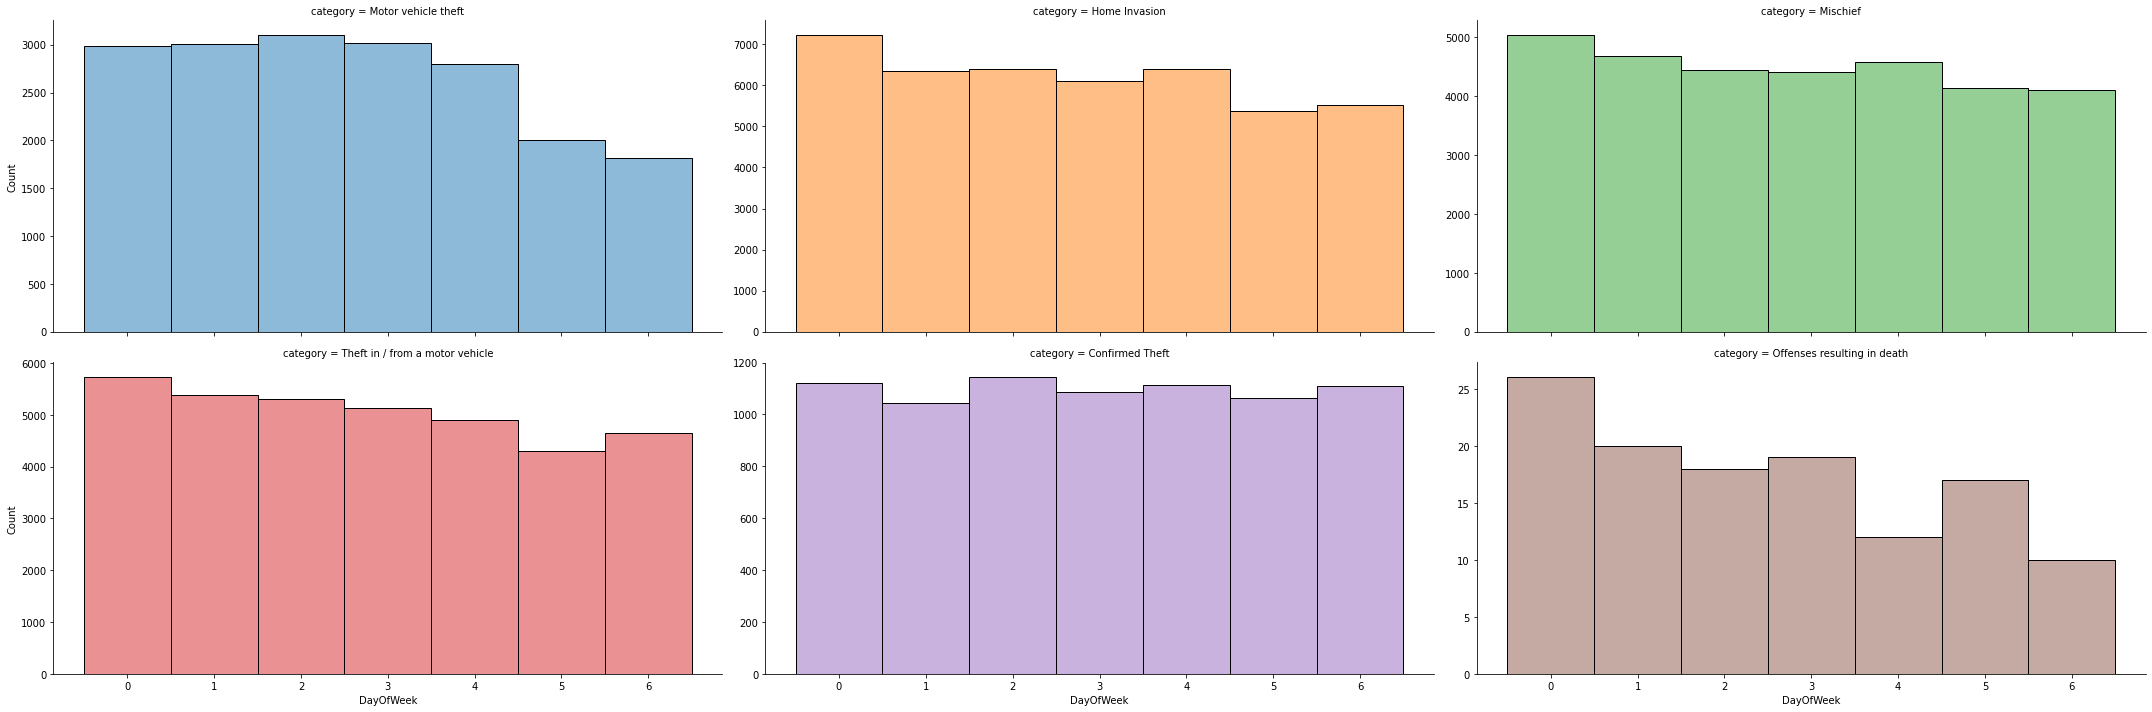

In [11]:
plt.figure(figsize = (640/2, 480/2))
sns.displot(mt_data, x="DayOfWeek", col = "category", col_wrap=3, aspect=2, hue="category", 
            kind = "hist", discrete = True, legend = False, facet_kws=dict(sharey=False),
)
plt.show()

In [13]:
mt_data.dtypes

Unnamed: 0         int64
category          object
date              object
postal_code       object
city              object
neighbourhood     object
year               int64
count              int64
longitude        float64
latitude         float64
month              int64
day                int64
hour               int64
DayOfWeek          int64
postal_code_1     object
postal_code_2     object
pc1               object
pc2               object
violent             bool
dtype: object

In [18]:
mt_data[mt_data["neighbourhood"].str.len()<20]

0         12
1         12
2         12
3         12
4         12
          ..
136637     6
136638     6
136639     6
136640     6
136641     6
Name: neighbourhood, Length: 136642, dtype: int64

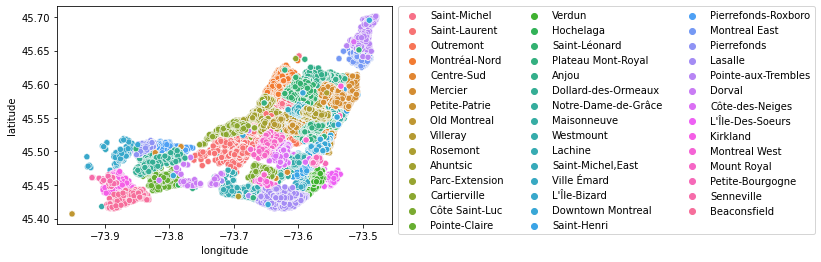

In [23]:
sns.scatterplot(data = mt_data[mt_data["neighbourhood"].str.len()<20],
                x="longitude", y="latitude", hue = "neighbourhood")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol = 3)
plt.show()